## CIS 242

## Spring 2020

## HOMEWORK ASSIGNMENT 3

Please compile your responses use markdown in your Jupyter notebook to answer the questions.  If you prefer, you may also submit a Word or PDF document with the responses along the PDF or HTML version of the completed notebook.   

#### Active notebooks (.ipynb files) or raw code (.py files) will NOT be accepted and no points will be given.

The code part of the files will not be graded, but they will be checked if necessary to verify your findings and recommendations. Point deductions may occur if there are major discrepancies between your written answers and the output from the code. 

Please organize your notebook to have the homework responses at the top and the working code underneath.

Each question is worth 2 points for a total of **20 points**.


## Predicting Loans for Universal Bank

Remember: You were recently hired as a data scientist by Universal Bank. The bank’s Vice President is interested learning what predictive analytics can do for the bank. She supplies you with a dataset containing information on a sample of customers. Here is a description of each variable in the Universal Bank dataset:

* ID: Customer ID 
* Age: Customer’s age in years
* Experience: Number of years of professional work experience
* Income: Annual income in thousands of dollars (\$000)
* Zip code: Zip code of home address
* Family: Customer’s family size
* CC Avg: Average spending on credit cards per month in thousands of dollars (\$000)
* Education: Education level where 1 = Undergraduate; 2 = Graduate; and 3=Advanced/Professional
* Mortgage: Value of house mortgage if any; in thousands of dollar (\$000)
* Personal.Loan: Did the customer accept a personal loan offered in the bank’s last campaign? 1=Yes; 0 = No.
* Securities.Account: Does the customer have a securities account with the bank? 1 = Yes; 0 = No.
* CD.Account: Does the customer have a certificate of deposit (CD) account with the bank? 1 = Yes; 0 = No.
* Online: Does the customer use Internet banking facilities? 1 = Yes; 0 = No.
* Credit.Card: Does the customer use a credit card issued by Universal Bank? 1 = Yes; 0 = No.


You have already investigated these data and now we are going to try some regression modelling.

#### Do NOT use the zip code variable for this analysis. 

#### 1. You are asked to explain the relationship between credit card balances and income.  How would you do that?  Assume you have data on income and average credit card balances. How strong is the relationship?

Set up environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(12345)
pd.set_option('precision', 4)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#environment setup code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

Import CSV file

In [2]:
UB_df = pd.read_csv('UniversalBank.csv')
bank = pd.DataFrame(UB_df)

#create a copy of bank dataframe and drop all columns except for 'Income' and 'CCAvg' to get better picture.
bank_copy = bank.drop(columns=['Age','Experience','ZIP Code','Family','Education','Mortgage','Personal Loan',
                                    'Securities Account', 'CD Account','Online','CreditCard'], axis = 0)
bank_copy.head()

,Income,CCAvg
0,49,1.6
1,34,1.5
2,11,1.0
3,100,2.7
4,45,1.0


In [3]:
bank_copy.corr().round(2)

,Income,CCAvg
Income,1.00,0.65
CCAvg,0.65,1.00


The correlation(r) between income and credit card balance is 0.65.

Text(0, 0.5, 'Credit card balance ($000)')

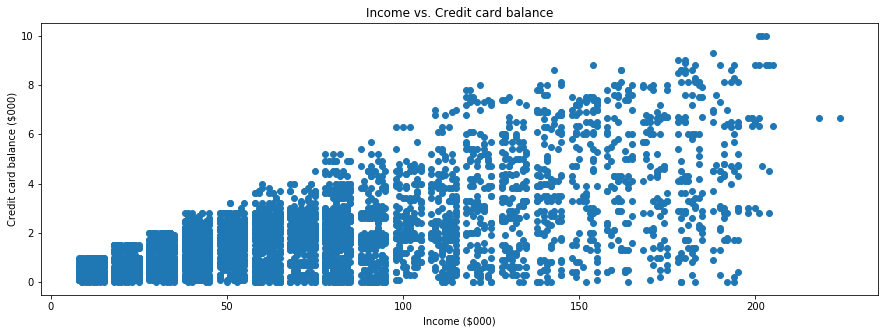

In [4]:
plt.figure(figsize=(15,5))

feature = bank_copy['Income']
target = bank_copy['CCAvg']
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

x=feature
y=target
plt.scatter(x, y, marker='o')
plt.title('Income vs. Credit card balance')
plt.xlabel('Income ($000)')
plt.ylabel('Credit card balance ($000)')
#create a scatter plot between income and credit card balance.

In [5]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(bank_copy.Income)
Y = bank_copy.CCAvg
print(X.shape, Y.shape)
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

(5000, 1) (5000,)


In [6]:
x2 = sm.add_constant(X)
models = sm.OLS(Y, x2)
result = models.fit()
print(result.summary())
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

                            OLS Regression Results                            
Dep. Variable:                  CCAvg   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     3579.
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:45:16   Log-Likelihood:                -8535.4
No. Observations:                5000   AIC:                         1.707e+04
Df Residuals:                    4998   BIC:                         1.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1286      0.036      3.608      0.0

R^2 = 0.417, indicating that around 41.7% of variability in credit card balance is attributable to income level.

In [10]:
lin_model = LinearRegression()
lin_model.fit(X, bank_copy.CCAvg)

print('Intercept: ', lin_model.intercept_)
print('Coefficient of Income: ', lin_model.coef_)
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

Intercept:  0.12859758458618797
Coefficient of Income:  [0.02452505]


Linear regression model of income as independent variable and credit card balance as dependent variable:
CCAvg = 0.129 + 0.025 * Income

In [11]:
Y_pred = lin_model.predict(X)

frame = {'Actual': Y, 'Fitted': Y_pred}
compare = pd.DataFrame(frame)

compare.head()
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

,Actual,Fitted
0,1.6,1.3303
1,1.5,0.9624
2,1.0,0.3984
3,2.7,2.5811
4,1.0,1.2322


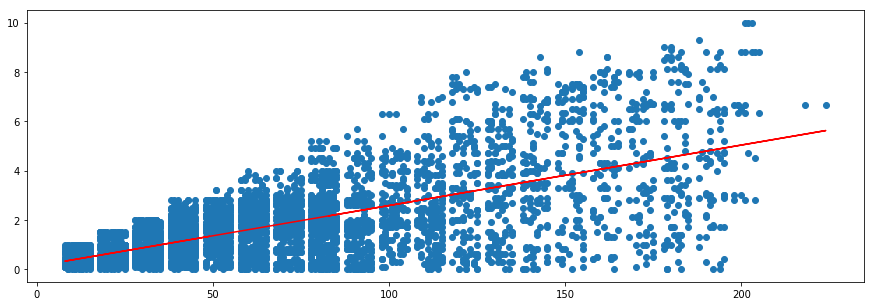

In [12]:
plt.figure(figsize=(15,5))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

#### 2. Now consider all the data you have.   What changes do you need to make to the data, if any? How much does credit use co-vary with income when you consider all the information? How strong is the relationship?

Drop ZIP Code from the dataframe as the numeric input of a variable that is actually categorical would impact the correlation coefficient values. As discussed in HW 2, zip codes provides no relevant information about the customer, besides assumptions. Because our assumptions that areas/zip codes are related to wealth or demographics of the population, it could introduce bias.

In [20]:
bank_copy1 = bank
del bank_copy1['ZIP Code']
bank_copy1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Another variable that needs to be modified is education because the variable is ordinal. If we compute the correlation with 'Edcuation' as it is, the linear regression model would interpret the value as 'years of education' instead of 'levels of education', which would lead us to misinterpret this variable's coefficient. Therefore, we need to subcategorize education levels into dummy variables.

In [21]:
#create empty lists that will later be treated as objects to fill in each education level column.
undergrad = []
grad = []
prof = []

#create function that takes in education level as argument and add dummy varaible values (0 or 1) in corresponding education
#level column.
def edu_lvl(val):
    if val == 1:
        undergrad.append(1)
        grad.append(0)
        prof.append(0)
    elif val == 2:
        undergrad.append(0)
        grad.append(1)
        prof.append(0)
    elif val == 3:
        undergrad.append(0)
        grad.append(0)
        prof.append(1)

#execute function for each row value of the 'Education column'.
for i in bank_copy1['Education']:
    edu_lvl(i)

In [22]:
#add dummy variables to columns.
bank_copy1.insert(2, "Undergrad", undergrad, True)
bank_copy1.insert(3, "Grad", grad, True)
bank_copy1.insert(4, "Prof", prof, True)
#code borrowed from https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

In [23]:
del bank_copy1['Education']
bank_copy1.head()

,Age,Experience,Undergrad,Grad,Prof,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,1,0,0,49,4,1.6,0,0,1,0,0,0
1,45,19,1,0,0,34,3,1.5,0,0,1,0,0,0
2,39,15,1,0,0,11,1,1.0,0,0,0,0,0,0
3,35,9,0,1,0,100,1,2.7,0,0,0,0,0,0
4,35,8,0,1,0,45,4,1.0,0,0,0,0,0,1


In [24]:
bank_copy1.corr().round(2)

,Age,Experience,Undergrad,Grad,Prof,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.00,0.99,-0.03,-0.02,0.05,-0.06,-0.05,-0.05,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,0.99,1.00,-0.00,-0.02,0.02,-0.05,-0.05,-0.05,-0.01,-0.01,-0.00,0.01,0.01,0.01
Undergrad,-0.03,-0.00,1.00,-0.53,-0.56,0.22,-0.12,0.16,0.04,-0.15,0.01,-0.01,0.00,0.01
Grad,-0.02,-0.02,-0.53,1.00,-0.41,-0.13,0.14,-0.09,-0.03,0.07,0.01,0.01,0.02,-0.01
Prof,0.05,0.02,-0.56,-0.41,1.00,-0.11,-0.01,-0.08,-0.01,0.09,-0.01,0.01,-0.02,-0.00
Income,-0.06,-0.05,0.22,-0.13,-0.11,1.00,-0.16,0.65,0.21,0.50,-0.00,0.17,0.01,-0.00
Family,-0.05,-0.05,-0.12,0.14,-0.01,-0.16,1.00,-0.11,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.05,-0.05,0.16,-0.09,-0.08,0.65,-0.11,1.00,0.11,0.37,0.02,0.14,-0.00,-0.01
Mortgage,-0.01,-0.01,0.04,-0.03,-0.01,0.21,-0.02,0.11,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.01,-0.01,-0.15,0.07,0.09,0.50,0.06,0.37,0.14,1.00,0.02,0.32,0.01,0.00


Now that we have multiple independent variables, we will be doing a multiple linear regression analysis.

In [25]:
bc1 = bank_copy1
X = bc1.iloc[:,]
X = X.drop('CCAvg' , axis='columns')
Y = bc1.iloc[:,7]

x2 = sm.add_constant(X)
models = sm.OLS(Y,x2)
result = models.fit()
result.summary()
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CCAvg   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     306.6
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:02:40   Log-Likelihood:                -8504.2
No. Observations:                5000   AIC:                         1.703e+04
Df Residuals:                    4987   BIC:                         1.712e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8391      0.306     -2.740      0.006      -1.439      -0.239
Age                    0.0594      0.016      3.751      0.000       0.028       0.090
Experience            -0.0624      0.016     -3.946      0.000      -0.093      -0.031
Undergrad             -0.1746      0.100     -1.739      0.082      -0.371       0.022
Grad                  -0.3147      0.106     -2.976      0.003      -0.522      -0.107
Prof                  -0.3498      0.111     -3.140      0.002      -0.568      -0.131
Income                 0.0229      0.001     44.261      0.000       0.022       0.024
Family                -0.0273      0.017     -1.612      0.107      -0.060       0.006
Mortgage              -0.0005      0.000     -2.576      0.010      -0.001      -0.000
Personal Loan          0.4080      0.082      4.986      0.000       0.248       0.568
Securities Account     0.0477      0.066      0.727      0.468      -0.081       0.176
CD Account             0.1467      0.095      1.548      0.122      -0.039       0.332
Online                -0.0577      0.039     -1.476      0.140      -0.134       0.019
CreditCard            -0.0413      0.044     -0.948      0.343      -0.127       0.044
==============================================================================
Omnibus:                      234.178   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              597.920
Skew:                           0.250   Prob(JB):                    1.46e-130
Kurtosis:                       4.619   Cond. No.                     5.28e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.18e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 3. How different is the relationship described by the two methods? Which approach gives you a "better" explanation of the relationship?  Why?

The first linear regression model with 'Income' as the only independent variable yielded an R^2 and adjusted R^2 value of 0.417. It makes sense that the value of both measures are the same because there is only one indenpendent variable in the first model. The second model, which is a multiple linear regression model, yields an R^2 value of 0.425 and adjusted R^2 value of 0.423. When modeling with multiple variables, adjusted R^2 is a better indicator of the actual fit of the model as an estimator because R^2 only increases with more variables/predictors, whereas adjusted R^2 does not. Based on this information, we can conclude that the multiple linear regression model provides a "better" explanation of the relationship. However, whether a linear model is the best fit or not is yet to be seen, as a log or quadratic regression model might fit the data points better.

#### 4. You are asked to predict the average credit card balance for a particular customer.  How much would you expect the following customer to owe on their credit card?  

Age = 40, Experience = 10, Income = 84, Family = 2, Education =2, Mortgage = 0, Securities Account = 0,Personal Loan = 0, CD Account = 0, Online = 1, and Credit Card = 1.

Using the coefficients of each independent variable we got from above, we can construct the following multiple regression model:

CCAvg = -0.839 + 0.059*Age - 0.062*Experience + 0.023*Income - 0.027*Family - 0.315*Grad - 0.001*Mortgage + 0.048*Securities Account + 0.408*Personal Loan + 0.147*CD Account - 0.058*Online - 0.041*Credit Card

We now substitute the values provided in the question into each variable to get an estimated credit card balance:

-0.839 + 0.059*40 - 0.062*10 + 0.023*84 - 0.027*2 - 0.315*1 - 0.001*0 + 0.048*0 + 0.408*0 + 0.147*0 - 0.058*1 - 0.041*1 = 2.365

The credit card balance is estimated to be 2.365 ($000)

#### 5. Now you are asked to build a model to predict whether or not a customer will accept a personal loan.  How will you do that?  What information will you use?  Why?


Because the target/dependent variable is now a dummy varaible, we will be doing a log regression analysis. This time, CCAvg will be added to the list of independent variables and personal loan will be the dependent/target variable. ZIP code will be discarded for the same reasons as before.

#### 6. Build the model.  What are the primary variables that might increase the likelihood that a customer will take out a loan?  How do you know that?

Because we do not know which variables are strongly correlated with personal loan yet, we will be running the test with all variables except for ZIP code to omit bias in selecting conditions. After running the log regression analysis, we will identify the varaibles with positive coefficients as rimary varaibles that might increase the likelihood of a customer taking out a loan.

In [26]:
#bring 'Personal Loan' column to te front to make assigning columns to X and Y later easier.
bc2 = bc1[['Personal Loan','Age','Experience','Undergrad','Grad','Prof','Income','Family','CCAvg','Mortgage',
          'Securities Account','CD Account','Online','CreditCard']]

In [27]:
from sklearn.linear_model import LogisticRegression

X_loan = bc2.iloc[:,1:]
print(X_loan.shape)
Y_loan = bc2.iloc[:,0]
print(Y_loan.shape)

logit = sm.Logit(Y_loan, X_loan)
result = logit.fit()
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

(5000, 13)
(5000,)
Optimization terminated successfully.
         Current function value: 0.117230
         Iterations 9


In [28]:
X_loan.dtypes

Age                     int64
Experience              int64
Undergrad               int64
Grad                    int64
Prof                    int64
Income                  int64
Family                  int64
CCAvg                 float64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Fri, 07 Feb 2020   Pseudo R-squ.:                  0.6293
Time:                        02:02:15   Log-Likelihood:                -586.15
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0359      0.067     -0.534      0.593      -0.168       0.096
Experience             0.0450      0.067      0.674      0.500      -0.086       0.176
Undergrad            -12.3108      1.818     -6.773      0.000     -15.873      -8.749
Grad                  -8.3454      1.792     -4.658      0.000     -11.857      -4.834
Prof                  -8.2468      1.814     -4.547      0.000     -11.802      -4.692
Income                 0.0602      0.003     20.289      0.000       0.054       0.066
Family                 0.6182      0.077      8.024      0.000       0.467       0.769
CCAvg                  0.1634      0.044      3.708      0.000       0.077       0.250
Mortgage               0.0007      0.001      1.196      0.232      -0.000       0.002
Securities Account    -0.8701      0.301     -2.894      0.004      -1.459      -0.281
CD Account             3.8389      0.342     11.239      0.000       3.169       4.508
Online                -0.7605      0.166     -4.589      0.000      -1.085      -0.436
CreditCard            -1.0382      0.213     -4.872      0.000      -1.456      -0.621
======================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Given the result summary, I will only use the variables/predictors with positive coefficients, as they are the variables that might positively affect the likelihood of a person taking out a loan. These variables are:
Exprience, Income, Family, CCAvg, Mortgage, and CD Account.

In [19]:
X_loan2 = bc2.iloc[:,[2,6,7,8,9,10,-3]]
X_loan2 = X_loan2.drop('Securities Account', axis='columns')
print(X_loan2.shape)
Y_loan2 = bank_copy1['Personal Loan']
print(Y_loan.shape)

logit = sm.Logit(Y_loan2, X_loan2)
result = logit.fit()

(5000, 6)
(5000,)
Optimization terminated successfully.
         Current function value: 0.312289
         Iterations 7


In [20]:
X_loan2.head(3)

,Experience,Income,Family,CCAvg,Mortgage,CD Account
0,1,49,4,1.6,0,0
1,19,34,3,1.5,0,0
2,15,11,1,1.0,0,0


We have now built the basis of our log regression model, which provides an accuracy score of 95.7%. We can guess which primary varaibles might increase the likelihood that a customer will take out a loan by identifying variables with positive coefficients. These include experience, having a graduate or professional degree, income, family size, credit card balance, mortgage(albeit being very small), and having a CD account.

#### 7. Train the model.  What parameter choices are you making?  Why? 

In [21]:
logreg = LogisticRegression(C=1e9, max_iter=5000)
#since there are 4000 rows, I set the max_iter to 5000

We will be taking 80% of the randomized sample for training and leave 20% for testing.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_loan2, Y_loan2, test_size = 0.2,
                                                   random_state = 12345)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

(4000, 6) (1000, 6)
(4000,) (1000,)


In [23]:
print(pd.DataFrame(Y_train).describe())
print("====================")
print(pd.DataFrame(Y_test).describe())
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

       Personal Loan
count      4000.0000
mean          0.0960
std           0.2946
min           0.0000
25%           0.0000
50%           0.0000
75%           0.0000
max           1.0000
       Personal Loan
count      1000.0000
mean          0.0960
std           0.2947
min           0.0000
25%           0.0000
50%           0.0000
75%           0.0000
max           1.0000


Randomizing the samples yields the training set and the test set to have the same mean and very close standard deviation values.

In [24]:
logreg.fit(X_train, Y_train)
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 8. Test the accuracy of your model. What is the overall accuracy of the model? 

In [25]:
from sklearn.metrics import accuracy_score
y_test_predict = logreg.predict(X_test)

print("Model accuracy:",accuracy_score(Y_test, y_test_predict))
#code borrowed from Professor Cannon's CIS 242 Lecture_3.pdf.

Model accuracy: 0.938


The overall accuracy of the model comes out to be 93.8%.

#### 9. Train at least two more versions of the model.  What changes did you make?  Why?

In the second model below, we will use all independent variables that we used in Question 6. to see if considering all variables would increase the overall accuracy of the model.

In [26]:
X_loan3 = bc2.iloc[:,1:]
print(X_loan3.shape)
Y_loan3 = bc2.iloc[:,0]
print(Y_loan3.shape)

logit = sm.Logit(Y_loan3, X_loan3)
result = logit.fit()

(5000, 13)
(5000,)
Optimization terminated successfully.
         Current function value: 0.117230
         Iterations 9


In [27]:
X_loan3.head(3)

,Age,Experience,Undergrad,Grad,Prof,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,1,0,0,49,4,1.6,0,1,0,0,0
1,45,19,1,0,0,34,3,1.5,0,1,0,0,0
2,39,15,1,0,0,11,1,1.0,0,0,0,0,0


In [28]:
logreg = LogisticRegression(C=1e9, max_iter=5000)

X_train, X_test, Y_train, Y_test = train_test_split(X_loan3, Y_loan3, test_size = 0.2,
                                                   random_state = 12345)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4000, 13) (1000, 13)
(4000,) (1000,)


In [29]:
logreg.fit(X_train, Y_train)
y_test_predict = logreg.predict(X_test)

print("Model accuracy:",accuracy_score(Y_test, y_test_predict))

Model accuracy: 0.957


When all the other variables were added back, the overall accuracy of the model in fact increased to 95.7%.

In the third model below, we will use Experience, Income, CCAvg, and Mortgage as independent variables. The reason for this is that when banks assess personal loans, they evaluate the person's employment history, income, and any outstanding debt. For this model, we will treat experience as employment history, income as income, and CCAvg & Mortgage as debt.

In [30]:
bc2.head(3)

,Personal Loan,Age,Experience,Undergrad,Grad,Prof,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,25,1,1,0,0,49,4,1.6,0,1,0,0,0
1,0,45,19,1,0,0,34,3,1.5,0,1,0,0,0
2,0,39,15,1,0,0,11,1,1.0,0,0,0,0,0


In [31]:
X_loan4 = bc2.iloc[:,[2,6,8,9]]
print(X_loan4.shape)
Y_loan4 = bc2.iloc[:,0]
print(Y_loan4.shape)

logit = sm.Logit(Y_loan4, X_loan4)
result = logit.fit()

(5000, 4)
(5000,)
Optimization terminated successfully.
         Current function value: 0.387865
         Iterations 7


In [32]:
X_loan4.head(3)

,Experience,Income,CCAvg,Mortgage
0,1,49,1.6,0
1,19,34,1.5,0
2,15,11,1.0,0


In [33]:
logreg = LogisticRegression(C=1e9, max_iter=5000)

X_train, X_test, Y_train, Y_test = train_test_split(X_loan4, Y_loan4, test_size = 0.2,
                                                   random_state = 12345)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4000, 4) (1000, 4)
(4000,) (1000,)


In [34]:
logreg.fit(X_train, Y_train)
y_test_predict = logreg.predict(X_test)

print("Model accuracy:",accuracy_score(Y_test, y_test_predict))

Model accuracy: 0.901


It turns out that the intuitive thought of taking debt-to-income factors as the only independent variables to find the likelihood of a customer taking out a personal loan actually yields a lower overall accuracy.

#### 10. Did the changes you make help?  Would you recommed it to the VP to target new personal loans? Why or why not? 

It turns out taking out variables and only adding certain varaibles to the model yields lower accuracy. For this reason, I would not recommend the changes to the VP and stick to taking all independent variables mentioned at the top of this assignment into account when building a prediction model. Afterall, we do not care about the correlation coefficient or the coefficient of determination when it comes to prediction as prediction does not concern about explaining the reason behind the relationships between variables.

## Working code below

All work is shown underneath each question.